# Sieci neuronowe i Deep Learning
# Temat 1: Wprowadzenie - perceptron

Kod testowany przy następujących wersjach bibliotek:

`numpy` = 1.26.4

`matplotlib` = 3.10.1

`pandas` = 2.2.3

Python 3.12.4

In [1]:
# Sprawdzanie wersji konretnego pakietu (na przykładzie pandas); "!", aby wykonać polecenie w notebooku:
!pip show pandas

Name: pandas
Version: 2.2.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [2]:
!python --version

Python 3.12.4


In [3]:
# Sposób na sprawdzenie najnowszej wersji wybranego pakietu (na przykładzie pandas):
!pip install pandas==999.0

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pandas==999.0 (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0, 0.21.1, 0.22.0, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.23.4, 0.24.0, 0.24.1, 0.24.2, 0.25.0, 0.25.1, 0.25.2, 0.25.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.2.4, 1.2.5, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.3.4, 1.3.5, 1.4.0rc0, 1.4.0, 1.4.1, 1.4.2, 1.4.3, 1.4.4, 1.5.0rc0, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 2.0.0rc0, 2.0.0rc1, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.1.0rc0, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0rc0, 2.2.0, 2.2.1, 2.2.2, 2.2.3)
ERROR: No matching distribution found for pandas==999.0


In [ ]:
# Aktualizacja pakietu do najnowszej dostępnej wersji:
!pip install --upgrade pandas

# Obiektowa implementacja metody perceptronu

Przyjmijmy **obiektowe podejście** i zdefiniujemy interfejs perceptronu jako **klasę języka Python**, pozwalającą na inicjowanie nowych obiektów `Perceptron`, które mogę uczyć się przy użyciu metody `fit` i dokonywać predykcji za pomocą oddzielnej metody `predict`.

Dodajemy podkreślnik (`_`) do atrybutów, które nie są tworzone w momencie inicjalizowania obiektu, lecz w chwili wywoływania przez inne metody.

In [5]:
import numpy as np  # Wykorzystana do przekształceń z tablicami oraz do generowania liczb losowych


class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.1, n_iter=50, random_state=1):  # Metoda __init__ - konstruktor klasy
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)  # Generator liczb losowych NumPy, zainicjalizowany przez użytkownika
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])  # Inicjalizacja wag z rozkładu normalnego
        self.b_ = np.float_(0.)  # Ustawienie wartości wyrazu wolnego na 0
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):  # Oblicza całkowite wejście (suma ważona cech i wyrazu wolnego)
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_  # np.dot liczy iloczyn wektorów

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)  # Jeśli wynik z net_input >= 0, przypisuje etykietę klasy 1, w p.p. 0

Technicznie rzecz biorąc, moglibyśmy zainicjować wagi na zero (tak jest zresztą robione w oryginalnym algorytmie perceptronu). Wtedy jednak szybkość uczenia $\eta$ nie miałaby żadnego wpływu na granicę decyzyjną. Omówimy to dokładniej w trakcie zajęć laboratoryjnych.

## Budowa modelu perceptronu na danych Iris

Zbiór danych Iris:
* 150 przykładów (każdy reprezentuje pojedynczy kwiat irysa),
* cechy: długość działki kielicha (*sepal length*) - w centymetrach, szerokość działki kielicha (*sepal width*) - w centymetrach, długość płatka (*petal length*) - w centymetrach, szerokość płatka (*petal width*) - w centymetrach,
* zmienna *class* - trzy gatunki irysów: setosa, virginica, versicolor,
* każdy gatunek kwiatu irysa jest reprezentowany przez 50 próbek.

### Wczytanie zbioru danych Iris

In [6]:
import os
from urllib.error import HTTPError
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,  # Plik nie zawiera wiersza nagłówkowego z nazwami kolumn
                     encoding='utf-8')  # Określa kodowanie znaków pliku
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    # Wczytanie danych z lokalnej ścieżki:
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [7]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# W razie problemów z pobraniem danych z Internetu:
df = pd.read_csv('your/local/path/to/iris.data', header=None, encoding='utf-8')

Do analizy bierzemy pierwszych 100 przykładów (50 kwiatów typu Iris-setosa i 50 Iris-versicolor) i konwertujemy etykiety klas na `1` (versicolor) i `0` (setosa). Nowe etykiety zapisujemy w wektorze `y`.
Ponadto ekstrahujemy pierwszą kolumnę (długość kielicha) i trzecią kolumnę (długość płatka) z tych 100 przykładów treningowych i tworzymy z nich macierz cech `X`.

In [8]:
import numpy as np

# Wydzielamy dwa gatunki (setosa oraz versicolor):
y = df.iloc[0:100, 4].values  # Wybiera wiersze od 0 do 99 i 5-tą kolumnę
                              # Metoda .values konwertuje tę kolumnę na tablicę NumPy
y = np.where(y == 'Iris-setosa', 0, 1)

# Wydzielamy dwie cechy (sepal length oraz petal length):
X = df.iloc[0:100, [0, 2]].values

### Wykres analizowanego zbioru danych

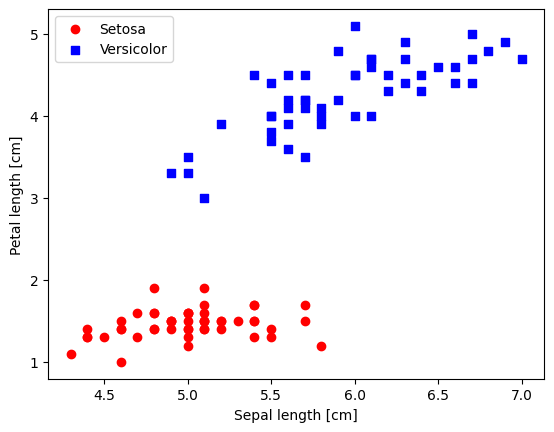

In [9]:
# %matplotlib inline
import matplotlib.pyplot as plt

# Wykres rozrzutu wybranych danych:
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')

plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

### Budowa (uczenie) modelu perceptronu

Budujemy model perceptronu oraz rysujemy wykres liczby błędów (błędnie sklasyfikowanych przykładów) dla kolejnych epok uczenia modelu.

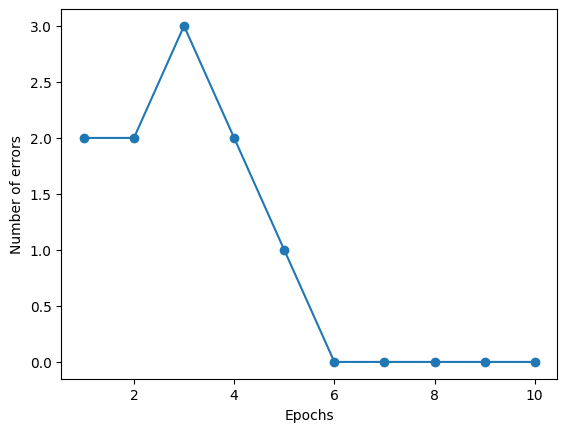

In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)  # Tworzymy instancję klasy Perceptron

ppn.fit(X, y)  # Za pomocą metody fit uczeymy model perceptronu

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')  # Number of errors = Number of updates

plt.show()

Perceptron rozdzielił obie klasy w szóstej epoce.

### Wizualizacja obszarów decyzyjnych klasyfikatora

Poniższy kod przedstawia implementację funkcji, która wizualizuje granicę decyzyjną klasyfikatora dla dwuwymiarowej przestrzeni cech.

In [11]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):  # resolution - rozmiar kroku siatki do wizualizacji przestrzeni

    # Definiujemy listy markerów i kolorów, które będą używane do reprezentowania różnych klas na wykresie:
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # Tworzymy mapę kolorów ListedColormap na podstawie kolorów określonych w colors. 
    # cmap to obiekt, który Matplotlib używa do mapowania liczb na kolory
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Wykres obszarów decyzyjnych:
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Określamy zakresy wartości dla obu cech (-/+ 1)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))  # Tworzymy dwuwymiarową siatkę punktów do wizualizacji przestrzeni cech
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  # Liczymy predykcje dla każdego punktu siatki
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)  # Rysowanie konturu granic decyzyjnych
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())  # Ustawiono granice osi wykresu

    # Rysowanie przykładów z rozważanych klas:
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

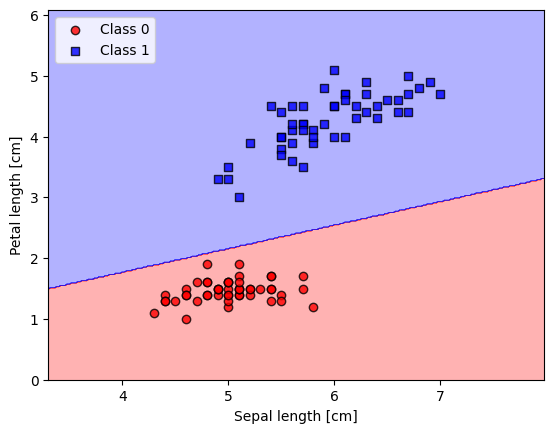

In [12]:
# Generujemy wykres dla naszego modelu perceptronu:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()